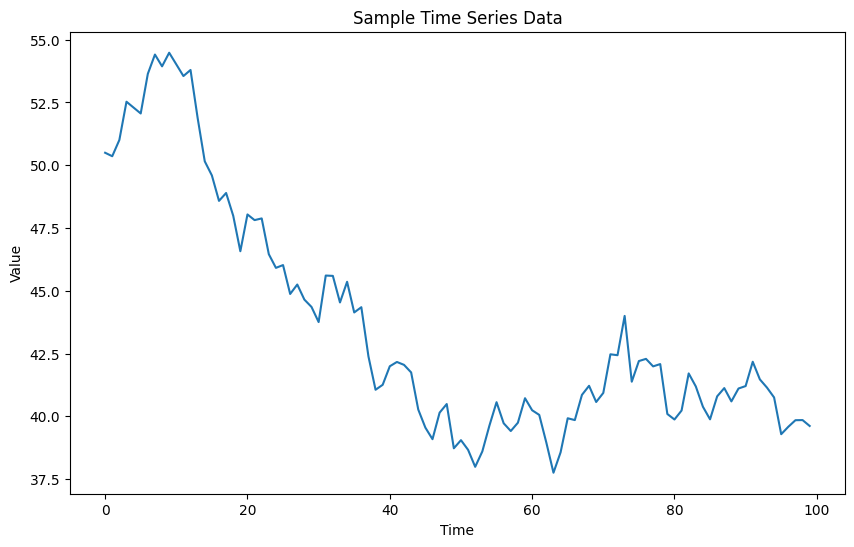

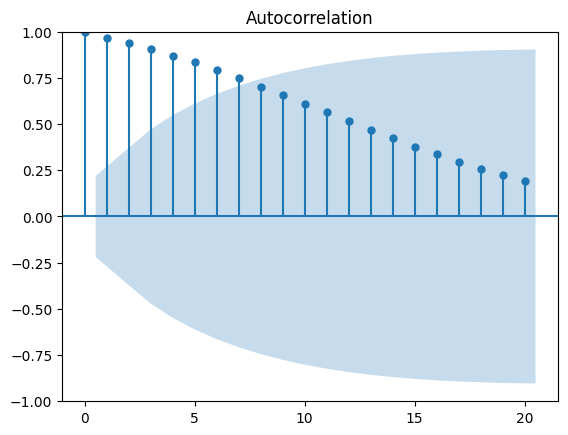

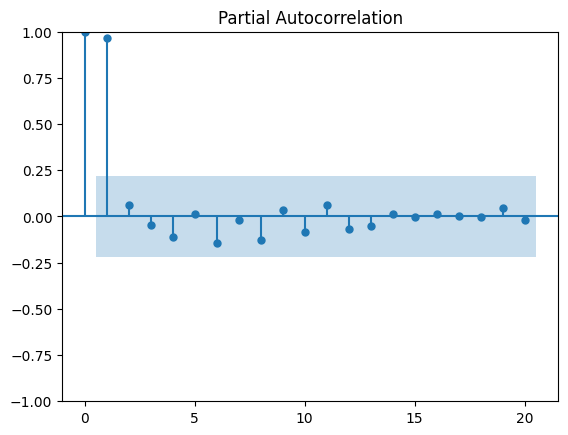

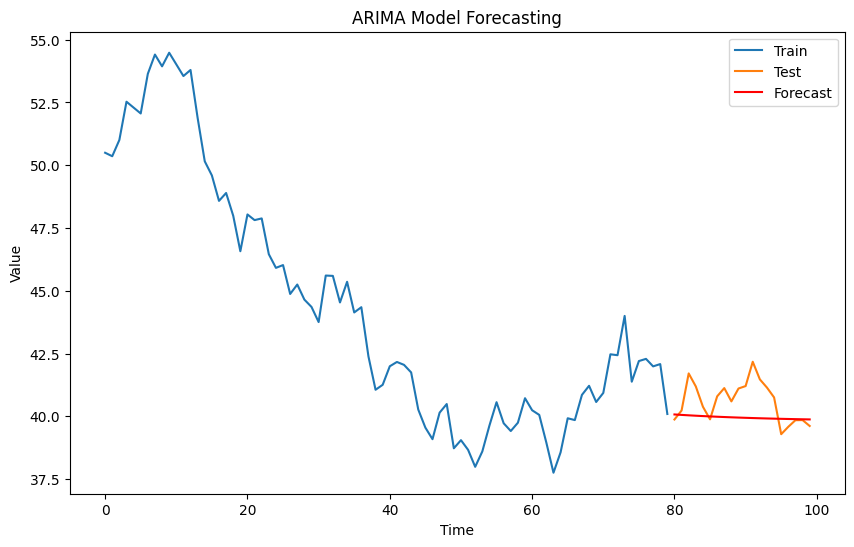

0.9942506455147493

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate sample data (for demonstration purposes)
np.random.seed(42)
data = np.cumsum(np.random.randn(100)) + 50  # Cumulative sum to generate a time series with a trend

# Convert the data to a pandas Series
time_series = pd.Series(data)

# Plot the sample data
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title("Sample Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Split the data into training and testing sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# ARIMA Model Implementation
# Find optimal parameters (p, d, q) using ACF and PACF plots
plot_acf(train)
plot_pacf(train)
plt.show()

# Fit the ARIMA model (p=1, d=1, q=1 as an example)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the future values on the test data
forecast = model_fit.forecast(steps=len(test))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(np.arange(train_size, len(time_series)), forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecasting")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Calculate the Mean Squared Error for model evaluation
mse = mean_squared_error(test, forecast)
mse
